<a href="https://colab.research.google.com/github/dariakrtn/AI_2022/blob/main/lab_6_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. *Импорт библиотек и вспомогательные функции*

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from typing import Mapping
import random

### *Функция распределения Гаусса*

In [2]:
def dist_gaus(x:float) -> float:
    return np.exp(-np.pi * x**2)

### *Функция распределения Коши*

In [3]:
def dist_cauchy(x:float) -> float:
    return 1 / np.pi * (1 / (1 + x**2))

### *Функция визуализации результатов*

In [4]:
def Show(function_distribution:Mapping, function_sampling:Mapping, min_number_points:int=100):
    x_cords = np.linspace(-4, 4, 1000)
    y_cords = function_distribution(x_cords)
    plt.plot(x_cords, y_cords)
    sample_points = function_sampling(function_distribution, min_number_points)
    plt.hist(sample_points, bins=10, density=True, color='pink')

# *1. Реализация алгоритма Rejection Sampling*

In [5]:
def Rejection_Sampling(function_distribution:Mapping, min_number_points:int=100):
    positive_points_x = list()
    count_points = 0
    while count_points < min_number_points:
        x = random.random() * 8 - 4
        y = random.uniform(0, 1)
        if y < function_distribution(x):
            positive_points_x.append(x)
            count_points += 1
    return positive_points_x

# *2. Результаты работы алгоритма Rejection Sampling*

### *Распределение Гауса* 

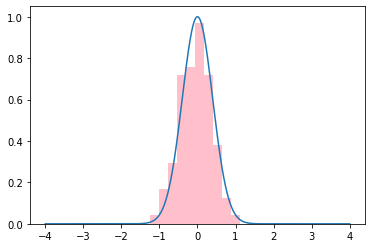

In [6]:
Show(function_distribution=dist_gaus, function_sampling=Rejection_Sampling)

### *Распредение Коши*

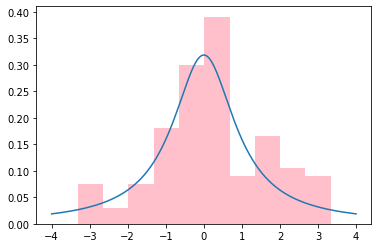

In [7]:
Show(function_distribution=dist_cauchy, function_sampling=Rejection_Sampling)

# *3. Реализация алгоритма Метрополиса Гастингса*

In [8]:
def Metropolis_Of_Hastings(function_distribution:Mapping, min_number_points:int=100):
    start_point = random.random() * 8 - 4
    count_points = 0
    positive_point = list()
    while count_points < min_number_points:
        new_point = function_distribution(start_point) + np.random.normal(size=1)*2
        if random.random() < function_distribution(new_point) / function_distribution(start_point):
            positive_point.append(new_point[0])
            start_point = new_point[0]
            count_points += 1
    return positive_point

# 4. Результаты работы алгоритма Метрополиса Гастингса

### *Распределение Гауса* 

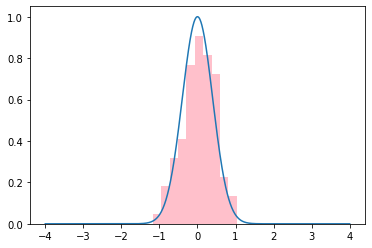

In [9]:
Show(function_distribution=dist_gaus, function_sampling=Metropolis_Of_Hastings)

### *Распредение Коши*

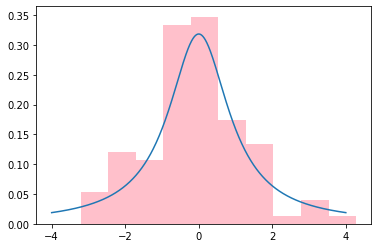

In [10]:
Show(function_distribution=dist_cauchy, function_sampling=Metropolis_Of_Hastings)